# Table of Contents

- [Gathering](#Gathering)
- [Assessing](#Assessing)
- [Observations](#Observations)
- [Cleaning](#Cleaning)
- [Visualizations](#Visualizations)
- [Sources](#sources)

## Project Details

- Data wrangling, which consists of:
    - Gathering data 
        1. From 'twitter-archive-enhanced.csv' file.
        2. From a [link]('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').
        3. From twitter API.
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 
    1. data wrangling efforts. 
    2. your data analyses and visualizations

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import os
from twitter_api import get_twitter_data
import json
from sqlalchemy import create_engine
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Do not truncate data in cells
pd.set_option('display.max_colwidth', None)

# Do not limit number of displayed columns
pd.set_option('display.max_columns', None)

# Display floats with 2 decimals
pd.set_option('display.float_format', '{:20,.2f}'.format)


# Gathering

In [2]:
#load twitter archive file into pandas df.
df_arch = pd.read_csv('data/twitter-archive-enhanced.csv')

In [3]:
#download image predictions file.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join('data/' + url.split('/')[-1]), 'wb') as file:
    file.write(response.content)

In [4]:
# load image predictions file into pandas df.
df_pred = pd.read_csv('data/image-predictions.tsv', sep='\t')

In [5]:
#download data from twitter API 
if not os.path.exists('data/tweet_json.txt'):
    get_twitter_data(df_arch, 'data/tweet_json.txt')

In [6]:
#load tweets data into pandas df
with open('data/tweet_json.txt') as file:
    df_api = pd.read_json(file, lines= True, encoding = 'utf-8')

***

# Assessing

In [7]:
df_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [8]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_arch[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,"2,356.00","2,356.00"
mean,13.13,10.46
std,45.88,6.75
min,0.00,0.00
25%,10.00,10.00
50%,11.00,10.00
75%,12.00,10.00
max,"1,776.00",170.00


In [10]:
df_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [11]:
df_arch.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Rontu        1
Goliath      1
Mark         1
Cal          1
Timofy       1
Name: name, Length: 957, dtype: int64

In [12]:
df_arch[df_arch.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,nan,nan,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,nan,nan,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,nan,nan,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,nan,nan,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,nan,nan,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,"859,196,978,902,773,760.00","4,196,983,835.00",2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,nan,nan,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,nan,nan,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,nan,nan,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",nan,nan,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,nan,nan,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,nan,nan,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,nan,nan,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,nan,nan,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2352,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None


In [13]:
# looking for numerators with wrong values in chunks
df_arch[df_arch.rating_numerator <= 5].loc[0:1000, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,nan,nan,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",nan,nan,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
315,835152434251116546,nan,nan,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,nan,nan,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
605,798576900688019456,nan,nan,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,"666,104,133,288,665,088.00","4,196,983,835.00",2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
730,781661882474196992,nan,nan,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,nan,nan,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None
765,777885040357281792,nan,nan,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,nan,nan,NaN,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None
883,760252756032651264,nan,nan,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,nan,nan,NaN,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None
912,757596066325864448,nan,nan,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,nan,nan,NaN,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4,10,None,None,None,None,None
956,751583847268179968,nan,nan,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,nan,nan,NaN,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,doggo,None,pupper,None


In [14]:
df_arch[df_arch.rating_numerator <= 5].loc[1000:2000, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1004,747816857231626240,nan,nan,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,nan,nan,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1016,746906459439529985,"746,885,919,387,574,272.00","4,196,983,835.00",2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",nan,nan,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None
1165,722974582966214656,nan,nan,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,nan,nan,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1189,718246886998687744,nan,nan,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,nan,nan,NaN,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3,10,Alexanderson,None,None,None,None
1219,714631576617938945,nan,nan,2016-03-29 01:53:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,nan,nan,NaN,https://twitter.com/dog_rates/status/714631576617938945/photo/1,4,10,Benedict,None,None,None,None
1249,711306686208872448,nan,nan,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,nan,nan,NaN,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3,10,None,None,None,None,None
1303,707420581654872064,nan,nan,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,nan,nan,NaN,https://twitter.com/dog_rates/status/707420581654872064/photo/1,4,10,Keurig,None,None,None,None
1314,706901761596989440,nan,nan,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,nan,nan,NaN,https://twitter.com/dog_rates/status/706901761596989440/photo/1,3,10,Elliot,None,None,None,None
1399,699691744225525762,nan,nan,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62",nan,nan,NaN,https://twitter.com/dog_rates/status/699691744225525762/photo/1,5,10,Dave,None,None,None,None
1406,699088579889332224,nan,nan,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charl. He's a bully. Chucks that dumbbell around like its nothing. 

In [15]:
df_arch[df_arch.rating_numerator <= 5].loc[2000:, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2013,672231046314901505,nan,nan,2015-12-03 01:49:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic underwater dog here. Very shy. Wont return tennis balls I toss him. Never been petted. 5/10 I bet he's soft https://t.co/WH7Nzc5IBA,nan,nan,NaN,https://twitter.com/dog_rates/status/672231046314901505/photo/1,5,10,None,None,None,None,None
2026,671879137494245376,nan,nan,2015-12-02 02:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brad. He's a chubby lil pup. Doesn't really need the food he's trying to reach. 5/10 you've had enough Brad https://t.co/vPXKSaNsbE,nan,nan,NaN,https://twitter.com/dog_rates/status/671879137494245376/photo/1,5,10,Brad,None,None,None,None
2038,671550332464455680,"671,544,874,165,002,240.00","4,196,983,835.00",2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,nan,nan,NaN,NaN,1,10,None,None,None,None,None
2063,671159727754231808,nan,nan,2015-11-30 02:52:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Anthony. He just finished up his masters at Harvard. Unprofessional tattoos. Always looks perturbed. 5/10 https://t.co/iHLo9rGay1,nan,nan,NaN,https://twitter.com/dog_rates/status/671159727754231808/photo/1,5,10,Anthony,None,None,None,None
2070,671122204919246848,nan,nan,2015-11-30 00:22:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Two miniature golden retrievers here. Webbed paws. Don't walk very efficiently. Can't catch a tennis ball. 4/10s https://t.co/WzVLdSHJU7,nan,nan,NaN,https://twitter.com/dog_rates/status/671122204919246848/photo/1,4,10,None,None,None,None,None
2076,670838202509447168,nan,nan,2015-11-29 05:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Pink dogs here. Unreasonably long necks. Left guy has only 1 leg. Quite nimble. Don't bark tho 4/10s would still pet https://t.co/QY5uvMmmQk,nan,nan,NaN,https://twitter.com/dog_rates/status/670838202509447168/photo/1,4,10,None,None,None,None,None
2079,670826280409919488,nan,nan,2015-11-29 04:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT",nan,nan,NaN,https://twitter.com/dog_rates/status/670826280409919488/photo/1,2,10,None,None,None,None,None
2091,670783437142401025,nan,nan,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,nan,nan,NaN,https://twitter.com/dog_rates/status/670783437142401025/photo/1,1,10,None,None,None,None,None
2092,670782429121134593,nan,nan,2015-11-29 01:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dude slaps your girl's ass what do you do?\n5/10 https://t.co/6dioUL6gcP,nan,nan,NaN,https://twitter.com/dog_rates/status/670782429121134593/photo/1,5,10,None,None,None,None,None
2109,670449342516494336,nan,nan,2015-11-28 03:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Vibrant dog here. Fabulous tail. Only 2 legs tho. Has wings but can barely fly (lame). Rather elusive. 5/10 okay pup https://t.co/cixC0M3P1e,nan,nan,NaN,https://twitter.com/dog_

In [16]:
df_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17,False,Labrador_retriever,0.17,True,spatula,0.04,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.72,True,malamute,0.08,True,kelpie,0.03,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.32,True,Pekinese,0.09,True,papillon,0.07,True


In [17]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [19]:
df_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [20]:
df_pred.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [21]:
df_api

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",nan,nan,nan,nan,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/Wrvtpnv7JV', 'entities': {'url': {'urls': [{'url': 'https://t.co/Wrvtpnv7JV', 'expanded_url': 'https://blacklivesmatters.carrd.co', 'display_url': 'blacklivesmatters.carrd.co', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 8835390, 'friends_count': 17, 'listed_count': 5751, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 145836, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 12636, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1267972589722296320/XBr04M6J_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1267972589722296320/XBr04M6J_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1591077312', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': False, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",nan,nan,None,nan,False,7579,35813,False,False,0.00,0.00,en,NaN,nan,nan,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,8921774213063

In [22]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [23]:
df_api.lang.value_counts()

en     2313
und       7
nl        3
in        3
et        1
tl        1
eu        1
ro        1
es        1
Name: lang, dtype: int64

***

## Observations
The following observations were made visually using Excel to view the data and Programmaticly using pandas functions.

### Quality

<font color=#0877cc size=4>**df_arch**</font>
1. Columns (`doggo`, `floofer`, `pupper`, `puppo`) has `None` for missing values.
2. `source` column is html tag `<a>` we can extract the source of the tweet and covert it to categorical.
3. `text` column has the link for the tweets and ratings at the end we can remove it.
4. `timestamp` column is `str` instead of `datetime`
5. We are interested in the tweet ONLY not the retweet there for we should remove those from the table.
6. We are interested in the tweet ONLY not the reply to the original tweet there for we should remove those from the table.
7. The `rating_numerator` column should of type `float` and also it should be correctly extracted.
8. `rating_denominator` column has values less than 10 and values more than 10 for ratings more than one dog.
9. `expanded_urls` column has NaN values
10. `id` column in df_api name different than the other 2 data sets.
11. `name` column have None instead of NaN and too many unvalid values.

## Tidiness

<font color=#0877cc size=4>**df_arch**</font>
- `doggo`, `floofer`, `pupper`, `puppo` columns are all about the same things, a kind of dog personality.

<font color=#0877cc size=4>**df_pred**</font>
- `img_num` useless.
- the columns (`p1`, `p1_dog`, `p1_conf`, ...etc) should be just `breed` and `confidence`.

<font color=#0877cc size=4>**df_api**</font>
- Just 3 columns needed `id`, `retweet_count`, `favorite_count`

<font color=#0877cc size=4>**General**</font>
- All datasets should be combined into 1 dataset only

***

# Cleaning

### First let's take a copy from our data frames to work on cleaning it.

In [24]:
df_arch_cleaned = df_arch.copy()
df_pred_cleaned = df_pred.copy()
df_api_cleaned = df_api.copy()

### Define
Replace 'None' with `np.nan` for Columns (`doggo`, `floofer`, `pupper`, `puppo`).

### Code

In [25]:
col_list = ['doggo', 'floofer', 'pupper', 'puppo']

for col in col_list:
    df_arch_cleaned[col] = df_arch_cleaned[col].replace('None', np.nan)

### Test

In [26]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       97 no

### Define
Extract tweet source from `source` column using `apply` meth in pandas and convert it to categorical.

### Code

In [27]:
# check for the unique values
df_arch_cleaned.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [28]:
#make a function fix_source which extract the strings between tags
def fix_source(x):
    'x is an html string from the source column in df_arch_cleaned dataset'
    #find the first closed  tag >
    i= x.find('>') + 1
    # find the first open tag after the previous <
    j =x[i:].find('<')
    # extract the text in between
    return x[i:][:j]

In [29]:
df_arch_cleaned.source = df_arch_cleaned.source.apply(lambda x: fix_source(x)).astype('category')

### Test

In [30]:
# check for the unique values
df_arch_cleaned.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']

### Define
Extract rating scores correctly from tweet text using RegEx and convert it to float

### Code

In [31]:
df_arch_cleaned[df_arch_cleaned.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\aghar\anaconda3\envs\dapnd\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [32]:
new_ratings = df_arch_cleaned[df_arch_cleaned.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
new_ratings

C:\Users\aghar\anaconda3\envs\dapnd\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,0
45,13.5
340,9.75
695,9.75
763,11.27
1689,9.5
1712,11.26


In [33]:
df_arch_cleaned.loc[new_ratings.index, 'rating_numerator'] = new_ratings.values


In [34]:
df_arch_cleaned.rating_numerator = df_arch_cleaned.rating_numerator.astype('float')

### Test

In [35]:
df_arch_cleaned.loc[new_ratings.index]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,nan,nan,2017-07-08 00:28:19 +0000,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",nan,nan,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10,Bella,NaN,NaN,NaN,NaN
340,832215909146226688,nan,nan,2017-02-16 13:11:49 +0000,Twitter for iPhone,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…","786,709,082,849,828,864.00","4,196,983,835.00",2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,NaN,NaN,NaN,NaN
695,786709082849828864,nan,nan,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",nan,nan,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,NaN,NaN,NaN,NaN
763,778027034220126208,nan,nan,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,nan,nan,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,NaN,NaN,pupper,NaN
1689,681340665377193984,"681,339,448,655,802,368.00","4,196,983,835.00",2015-12-28 05:07:27 +0000,Twitter for iPhone,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,nan,nan,NaN,NaN,9.50,10,None,NaN,NaN,NaN,NaN
1712,680494726643068929,nan,nan,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,nan,nan,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,None,NaN,NaN,NaN,NaN


In [36]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   category
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   float64 
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  doggo             

### Define
Remove ratings and links from `text` column using `RegEx`.

### Code

In [37]:
df_arch_cleaned.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [38]:
df_arch_cleaned.text = df_arch_cleaned.text.str.extract('(.+(?=\s\d+/\d+\s))')

### Test

In [39]:
df_arch_cleaned.text.sample(10)

1237                                                     Reminder that we made our first set of stickers available! All are
1216                                                         This is Calbert. He forgot to clear his Google search history.
1917                                                         This is Kenny. He just wants to be included in the happenings.
1667                                                                                                                    NaN
861                            This is Belle. She's a Butterflop Hufflepoof. Rarer than most. Having trouble with car seat.
1472                        This is Kobe. He's a Speckled Rorschach. Requests that someone holds his hand during car rides.
2035                                                                               This is Oscar. He's ready for Christmas.
2207    This is Timofy. He's a pilot for Southwest. It's Christmas morning &amp; everyone has gotten kickass gifts but him.
1456    

### Define
Converte `timestamp` column to datetime.

### Code

In [40]:
df_arch_cleaned.timestamp = pd.to_datetime(df_arch_cleaned.timestamp)

### Test

In [41]:
df_arch_cleaned.timestamp.dtype

datetime64[ns, UTC]

### Define
Remove retweets and replies.

### Code

In [42]:
df_arch_cleaned = df_arch_cleaned.query('in_reply_to_status_id == "NaN" &\
                                                     in_reply_to_user_id == "NaN" &\
                                                    retweeted_status_id == "NaN" &\
                                                    retweeted_status_user_id == "NaN"')
# drop columns
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
df_arch_cleaned.drop(columns = cols, axis=1, inplace=True)

### Test


In [43]:
# check for Null values in the df_arch_cleaned
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2029 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
dtypes: category(1), datetime64[ns, UTC

### Define
Remove values other than 10 for `rating_denominator`

### Code

In [44]:
df_arch_cleaned = df_arch_cleaned[df_arch_cleaned['rating_denominator'] == 10]

### Test

In [45]:
df_arch_cleaned[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,"2,080.00","2,080.00"
mean,11.66,10.00
std,39.79,0.00
min,0.00,10.00
25%,10.00,10.00
50%,11.00,10.00
75%,12.00,10.00
max,"1,776.00",10.00


### Define
Remove any rows not related to dogs


### Code

In [46]:
df_arch_cleaned = df_arch_cleaned[~df_arch_cleaned.text.isnull()]

In [47]:
df_arch_cleaned = df_arch_cleaned.loc[~df_arch_cleaned.text.str.match('.*only rate dogs')]

### Test

In [48]:
df_arch_cleaned.loc[df_arch_cleaned.text.str.match('.*only rate dogs')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [49]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   category           
 3   text                1963 non-null   object             
 4   expanded_urls       1961 non-null   object             
 5   rating_numerator    1963 non-null   float64            
 6   rating_denominator  1963 non-null   int64              
 7   name                1963 non-null   object             
 8   doggo               82 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              225 non-null    object             
 11  puppo               23 non-null     object             
dtypes: category(1), datetime64[ns, UTC

### Define
Drop rows with NaNs for `expanded_urls` column.

### Code

In [50]:
df_arch_cleaned = df_arch_cleaned.loc[~df_arch_cleaned.expanded_urls.isnull()]

### Test

In [51]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1961 non-null   int64              
 1   timestamp           1961 non-null   datetime64[ns, UTC]
 2   source              1961 non-null   category           
 3   text                1961 non-null   object             
 4   expanded_urls       1961 non-null   object             
 5   rating_numerator    1961 non-null   float64            
 6   rating_denominator  1961 non-null   int64              
 7   name                1961 non-null   object             
 8   doggo               82 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              224 non-null    object             
 11  puppo               23 non-null     object             
dtypes: category(1), datetime64[ns, UTC

### Define
Create `dog_stage` column and remove the (`doggo`, `floofer`, `pupper`, `puppo`) columns.

### Code

In [52]:
# select the dog stages columns from the dataset
cols = ['doggo', 'floofer', 'pupper', 'puppo']

# create the dog_stage column with joining the four columns in one column dog_stage join for more than stage
df_arch_cleaned['dog_stage'] = df_arch_cleaned[cols].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
df_arch_cleaned.dog_stage = df_arch_cleaned.dog_stage.replace('', np.nan).astype('category')

# drop the 4 columns
df_arch_cleaned = df_arch_cleaned.drop(columns = cols, axis =1)

### Test

In [53]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1961 non-null   int64              
 1   timestamp           1961 non-null   datetime64[ns, UTC]
 2   source              1961 non-null   category           
 3   text                1961 non-null   object             
 4   expanded_urls       1961 non-null   object             
 5   rating_numerator    1961 non-null   float64            
 6   rating_denominator  1961 non-null   int64              
 7   name                1961 non-null   object             
 8   dog_stage           328 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 126.9+ KB


In [54]:
df_arch_cleaned.dog_stage.value_counts()

pupper            215
doggo              71
puppo              22
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Define
- Replace 'None' with np.name in df_arch `name` column.
- Remove any rows with invalid names which starts with lower laters.

### Code

In [55]:
df_arch_cleaned[~df_arch_cleaned.name.str.istitle()].name.unique()

array(['such', 'a', 'not', 'one', 'BeBe', 'DonDon', 'my', 'his',
       'actually', 'just', 'mad', 'all', 'old', 'infuriating', 'CeCe',
       'the', 'by', 'officially', 'life', 'light', 'space', 'JD', 'an',
       'DayZ', 'quite'], dtype=object)

In [56]:
df_arch_cleaned.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',
       'by', 'officially', 'life', 'light', 'space', 'None'], np.nan, inplace=True)

### Test

In [58]:
df_arch_cleaned.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Grizzwald', 'Rusty', 'Gus', 'Stanley',
       'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis', 'Bella', 'Jesse',
       'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy',
       'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger',
       'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed', 'Sebastian',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter',
       'Cooper', 'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn',
       'Zooey', 'Dave', 'Jersey', 'Hobbes', 'Burt', 'Carl', 'Jor

In [60]:
df_arch_cleaned.name.value_counts()

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
           ..
Dug         1
Shiloh      1
Furzey      1
Lance       1
Kyro        1
Name: name, Length: 911, dtype: int64

In [61]:
df_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1961 non-null   int64              
 1   timestamp           1961 non-null   datetime64[ns, UTC]
 2   source              1961 non-null   category           
 3   text                1961 non-null   object             
 4   expanded_urls       1961 non-null   object             
 5   rating_numerator    1961 non-null   float64            
 6   rating_denominator  1961 non-null   int64              
 7   name                1362 non-null   object             
 8   dog_stage           328 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 126.9+ KB


### Define
- Remove `img_num` column from df_pred_cleand.

### Code

In [62]:
df_pred_cleaned.drop('img_num', axis=1, inplace=True)

### Test

In [63]:
df_pred_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


### Define
Create `breed` and `confidence` columns with highest confidence predictions and drop other columns

### Code

In [64]:
breed = []
confidence = []
# iterating over df_pred row by row and taking the highest confident prediction other wise np.nan
for index, row in df_pred_cleaned.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
df_pred_cleaned['breed'] = breed
df_pred_cleaned['confidence'] = confidence


In [65]:
df_pred_cleaned = df_pred_cleaned[['tweet_id', 'jpg_url', 'breed', 'confidence']]

### Test

In [66]:
df_pred_cleaned.sample(10)

,tweet_id,jpg_url,breed,confidence
621,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.44
685,683857920510050305,https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg,bluetick,0.17
1261,748932637671223296,https://pbs.twimg.com/media/CmS-QkQWAAAkUa-.jpg,borzoi,0.74
1291,751538714308972544,https://pbs.twimg.com/media/Cm4AeG8XEAAulD2.jpg,Labrador_retriever,0.52
1113,724405726123311104,https://pbs.twimg.com/media/Cg2bKLAWwAA0WEm.jpg,golden_retriever,0.24
1128,727685679342333952,https://pbs.twimg.com/media/ChlCQg-VIAQ_8g4.jpg,Border_collie,0.46
1536,790581949425475584,https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg,NaN,nan
1442,775364825476165632,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,beagle,0.57
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,NaN,nan
943,704347321748819968,https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg,NaN,nan


In [67]:
df_pred_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


### Define
Remove unnecessary columns for df_api_cleand

### Code

In [68]:
df_api_cleaned.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [69]:
df_api_cleaned = df_api_cleaned[['id', 'retweet_count', 'favorite_count']]

### Test

In [70]:
df_api_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


### Define
Rename `id` column in df_api_cleand to `tweet_id`

### Code

In [71]:
df_api_cleaned.columns = ['tweet_id', 'retweet_count', 'favorite_count']

### Test

In [72]:
df_api_cleaned.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Define
- merge data into database

### Code

In [73]:
df = pd.merge(df_arch_cleaned, df_pred_cleaned, on='tweet_id')
df = pd.merge(df, df_api_cleaned, on = 'tweet_id')

In [75]:
# Create SQLAlchemy Engine and empty twitter_archive_master database
engine = create_engine('sqlite:///data/twitter_archive_master.db')
# Store master df into table master 
try:
    df.to_sql('master', engine, index=False)
except Exception as e:
    print(e)
    

### Test

In [76]:
df_master = pd.read_sql('SELECT * FROM master', engine, parse_dates='timestamp')
df_master.source = df_master.source.astype('category')
df_master.dog_stage = df_master.dog_stage.astype('category')
df_master.breed = df_master.breed.astype('category')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1834 non-null   int64         
 1   timestamp           1834 non-null   datetime64[ns]
 2   source              1834 non-null   category      
 3   text                1834 non-null   object        
 4   expanded_urls       1834 non-null   object        
 5   rating_numerator    1834 non-null   float64       
 6   rating_denominator  1834 non-null   int64         
 7   name                1316 non-null   object        
 8   dog_stage           295 non-null    category      
 9   jpg_url             1834 non-null   object        
 10  breed               1350 non-null   category      
 11  confidence          1350 non-null   float64       
 12  retweet_count       1834 non-null   int64         
 13  favorite_count      1834 non-null   int64       

***

# Visualizations

- let's have a look for the ratings distribution by ploting a bar chart for it's frequency.

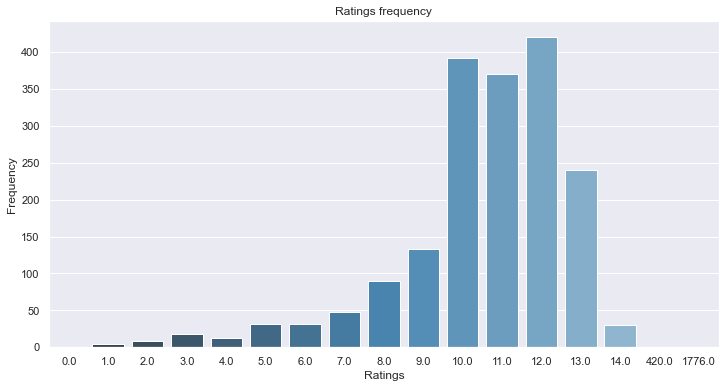

In [93]:
data = df_master.rating_numerator.value_counts()

x = data.index
y = data.values
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(x, y, palette='Blues_d', ax=ax)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

- let's have a look for the same distribution with box plot.

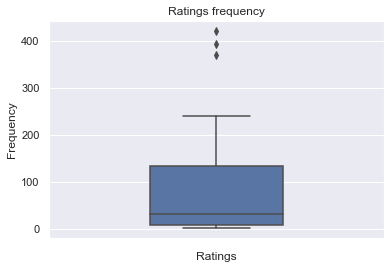

In [78]:
data = df_master.rating_numerator.value_counts()

ax = sns.boxplot(data, orient='v', width=.4)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

As we can see that their are 2 outliers here so let's investigate more and check their data

In [79]:
outliers_df = df_master[df_master.rating_numerator > 400][['rating_numerator', 'name', 'jpg_url', 'text']]
outliers_df

,rating_numerator,name,jpg_url,text
676,"1,776.00",Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,This is Atticus. He's quite simply America af.
1578,420.00,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,Good dogg.


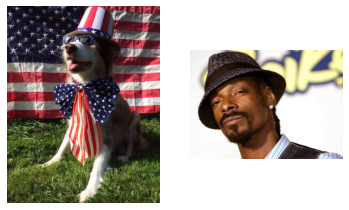

In [80]:
if not os.path.exists('images'):
    os.makedirs('images')
fig=plt.figure()
c = 1
for index, row in outliers_df.iterrows():
    r = requests.get(row['jpg_url'])
    i = Image.open(BytesIO(r.content))
    i.save('images/' +  str(index) + '_' + str(row['rating_numerator']) + "_" + str(row['name']) + '.jpg')
    fig.add_subplot(1, 2, c)
    c += 1
    plt.imshow(i)
    plt.axis("off")
plt.show()

### Define
- So we can see here that the picture with 1776 rating is simply very cute dog and has the best rating score but the other pic with 420 rating score is the rap star Snoop Dogg and should be removed from our data.

### Code

In [81]:
# Remove 'Snoop Dogg' from our master data
df_master.drop(index=1552, inplace=True)

### Test

In [82]:
df_master.query('rating_numerator == 420')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,retweet_count,favorite_count
1578,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,Good dogg.,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.00,10,None,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,NaN,nan,8189,23472


In [83]:
df_master.rating_numerator.unique()

array([1.300e+01, 1.200e+01, 1.400e+01, 1.100e+01, 6.000e+00, 1.000e+01,
       0.000e+00, 5.000e+00, 3.000e+00, 7.000e+00, 8.000e+00, 9.000e+00,
       4.000e+00, 1.776e+03, 2.000e+00, 1.000e+00, 4.200e+02])

- Next we can look for the relation betwee 'retweet_count' and 'favorite_count'

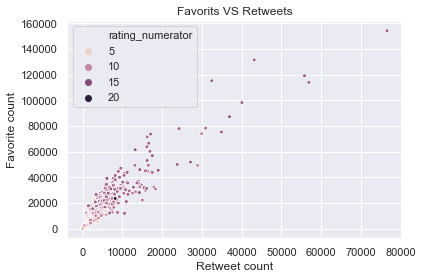

In [84]:
# Scatter plot to show the relation between favorits and retweets
ax = sns.scatterplot(x='retweet_count', y='favorite_count', data=df_master,
                     hue='rating_numerator', hue_norm=(5, 20), s=15) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets')
plt.show()

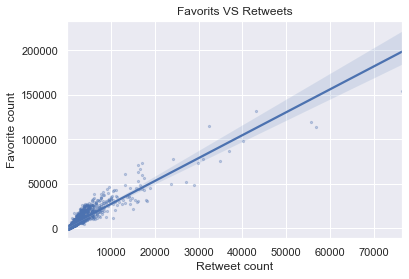

In [85]:
ax = sns.regplot(x='retweet_count', y='favorite_count', data=df_master, color='b', scatter_kws={'s':5, 'alpha':.3}) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets')
plt.show()

As we expected the favorite and retweets are highly postive correlated.

- Now let's compare dog stages

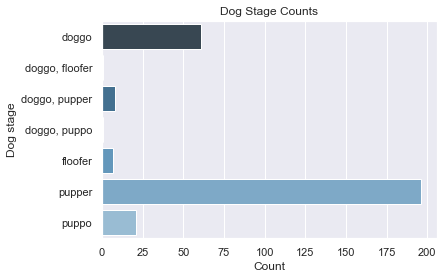

In [86]:
data = df_master.groupby('dog_stage').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Dog stage', title='Dog Stage Counts')
plt.show()

As we can see the most common stage is pupper 

- Comparing tweets different sources

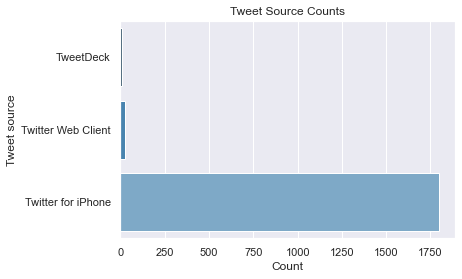

In [87]:
data = df_master.groupby('source').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Tweet source', title='Tweet Source Counts')
plt.show()

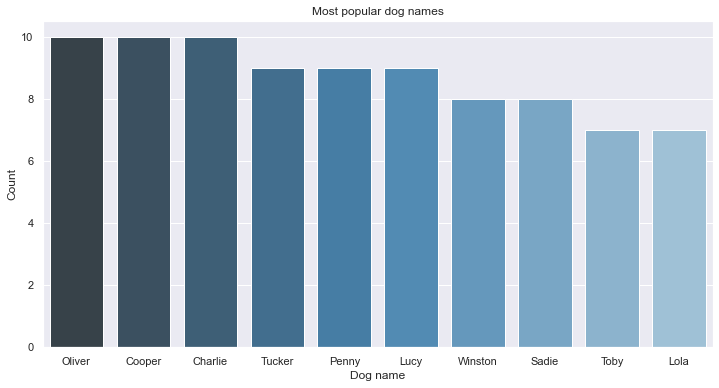

In [92]:
data = pd.read_sql("""SELECT name, COUNT(*) AS count
                        FROM master 
                    GROUP BY 1
                      HAVING name <> 'A'
                    ORDER BY 2 DESC
                       LIMIT 10;
                  """, engine)
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(x='name', y='count', data=data, palette='Blues_d', ax=ax)
ax.set(ylabel='Count', xlabel='Dog name', title='Most popular dog names')
plt.show()

And as we see here they tweeted the most from iPhone 

***

# Sources

- some helps from old student projects from github https://github.com/ahmed-gharib89/wrangle-and-analyze_data
- Reading pandas data frame row by row [Stack over flow](https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas)
- For the word cloud funny image I followed this [tutorial](https://www.datacamp.com/community/tutorials/wordcloud-python) at [DataCamp](www.datacamp.com)